For Module 2 Project, we evaluate data on European soccer matches to select statistics for 2011

In [11]:
#import needed software for exercise - pandas, sqlite, required to retrieve data from supplied relational database
import pandas as pd
import sqlite3
pysqldf = lambda q: sqldf(q, globals())

In [27]:
#establish connection and cursor to operate in the relational database
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [28]:
#review the database tables, within the relational database
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('Matches',), ('Teams_in_Matches',), ('Teams',), ('Unique_Teams',)]


In [134]:
#Evaluate the structure of table sqlite_sequence
c.execute("""select *
                    from sqlite_sequence limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,name,seq
0,Matches,46774
1,Unique_Teams,128


In [14]:
#Evaluate the structure of table Matches
c.execute("""select *
                    from Matches limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [15]:
#Evaluate the structure of table Teams
c.execute("""select *
                    from Teams limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [18]:
#Evaluate the structure of table Unique_Teams
c.execute("""select *
                    from Unique_Teams limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [19]:
#Evaluate the structure of table Teams_in_Matches
c.execute("""select *
                    from Teams_in_Matches limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [20]:
#Evaluate the structure of table Flatview
c.execute("""select *
                    from Flatview limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,AvgAgeHome,...,ForeignPlayersHome,ForeignplayersAways,KaderHome,KaderAway,StadiumCapacity,StadiumCapacityAway,AvgMarketValueHome,MarketValueAway,OverallMarketValueHome,OverallMarketValueAway
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,25,...,8,13,29,32,47728,47728,305000,747000,8850000,23900000
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A,24,...,18,13,33,32,47728,47728,658000,747000,21700000,23900000
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D,26,...,20,13,34,32,47728,47728,385000,747000,13100000,23900000
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H,26,...,20,9,34,37,47728,47728,385000,570000,13100000,21100000
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A,25,...,14,9,37,37,47728,47728,349000,570000,12930000,21100000


In [93]:
#Evaluate the structure of table Flatview_Advanced
c.execute("""select *
                    from Flatview_Advanced limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,5772,1,Bayern Munich,D1,2005,2005-08-05,Bayern Munich,M'gladbach,3,0,H,25,27,14,171500000,6860000,75000
1,5378,1,Bayern Munich,D1,2005,2005-08-13,Leverkusen,Bayern Munich,2,5,A,25,27,14,171500000,6860000,75000
2,5693,1,Bayern Munich,D1,2005,2005-08-27,Bayern Munich,Hertha,3,0,H,25,27,14,171500000,6860000,75000
3,5386,1,Bayern Munich,D1,2005,2005-09-10,Nurnberg,Bayern Munich,1,2,A,25,27,14,171500000,6860000,75000
4,5661,1,Bayern Munich,D1,2005,2005-09-17,Bayern Munich,Hannover,1,0,H,25,27,14,171500000,6860000,75000


In [150]:
#After review of available tables, decided to use the Flatview_Advanced table for our project, as it contains the
#   fields we need within one table. But, we don't need all fields, so select a subset of fields for our working df. 
#Create a dataframe from Flatview_Advanced and call it "results."  We also created a df called "df."

#Create a subset of Flatview_Advanced as a pandas dataframe called results
c.execute("""SELECT Match_ID, Unique_Team_ID, Unique_Team, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR
                    FROM Flatview_Advanced
                    WHERE Season = '2011';""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
results= pd.DataFrame.from_records(data = df, columns = df.columns)
results.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A
1,1094,1,Bayern Munich,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
2,1211,1,Bayern Munich,2011-08-20,Bayern Munich,Hamburg,5,0,H
3,1104,1,Bayern Munich,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A
4,1197,1,Bayern Munich,2011-09-10,Bayern Munich,Freiburg,7,0,H


In [232]:
#Create new columns to contain calculated values in order to track each team's hits
# Logic: if the HomeTeam name is the same as the Unique_Team in this table, this is a home game for the team. 
# Create a new column called TeamScores, and copy the FTHG field (goals for the home team) into the TeamScores column.
# Likewise, if the AwayTeam name is the same as the Unique_Team in this table, this is an away game for the team.
# Copy the FTAG (goals for the away team) into the TeamScores column.

results.loc[results['HomeTeam'] == results['Unique_Team'], 'TeamScores'] = results['FTHG']
results.loc[results['AwayTeam'] == results['Unique_Team'], 'TeamScores'] = results['FTAG']
results.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0
1,1094,1,Bayern Munich,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1.0
2,1211,1,Bayern Munich,2011-08-20,Bayern Munich,Hamburg,5,0,H,5.0
3,1104,1,Bayern Munich,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,3.0
4,1197,1,Bayern Munich,2011-09-10,Bayern Munich,Freiburg,7,0,H,7.0


In [189]:
#Create a new df that contains a sum of each team's scores, by using a sum call in the TeamScores column.
#  This new df, called score_stats has columns Unique_Teams and sums of TeamScores.

score_stats_temp = results.groupby('Unique_Team')['TeamScores'].sum()
score_stats = pd.Series.to_frame(score_stats_temp)
score_stats.head()

,TeamScores
Unique_Team,
Aachen,30.0
Augsburg,36.0
Bayern Munich,77.0
Bochum,41.0
Braunschweig,37.0


In [200]:
#For our calculations later, we need the total number of games played by each team.  Retrieve this information using
#   sqlite from the original Flatview_Advanced table with a GROUP BY statement to sqllite.  Do this only for teams
#   in the 2011 season.  
c.execute("""SELECT Unique_Team, COUNT(FTR) AS Total_Games
                                 FROM Flatview_Advanced
                                 WHERE Season = '2011'
                                 GROUP BY Unique_Team_ID;
          """
         )

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Unique_Team,Total_Games
0,Bayern Munich,34
1,Dortmund,34
2,Leverkusen,34
3,Schalke 04,34
4,M'gladbach,34
5,Wolfsburg,34
6,FC Koln,34
7,Hoffenheim,34
8,Hertha,34
9,Mainz,34


In [178]:
#To establish the number of winning games, use a sqlite query to retrieve games from 2011 season, and where the
#   team is either the home team or the away team (using the logic previously described to identify teams.)
#   Generate df for Teams and their Winning Games statistics

c.execute("""SELECT Unique_Team, COUNT(FTR) as Win_Games
                                 FROM 
                                 (SELECT * from Flatview_Advanced
                                 WHERE Season = '2011') 
                                 WHERE (FTR ='H' AND HomeTeam = Unique_Team) OR (FTR = 'A' AND AwayTeam = Unique_Team)
                                 GROUP BY Unique_Team_ID;
          """
         )

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
win_stats= pd.DataFrame.from_records(data = df, columns = df.columns)
win_stats

,Unique_Team,Win_Games
0,Bayern Munich,23
1,Dortmund,25
2,Leverkusen,15
3,Schalke 04,20
4,M'gladbach,17
5,Wolfsburg,13
6,FC Koln,8
7,Hoffenheim,10
8,Hertha,7
9,Mainz,9


In [177]:
#Using same logic as previous query, generate a df for Teams and their Losing Games statistics.

c.execute("""SELECT Unique_Team, COUNT(FTR) as Lose_Games
                                 FROM 
                                 (SELECT * from Flatview_Advanced
                                 WHERE Season = '2011') 
                                 WHERE (FTR ='H' AND AwayTeam = Unique_Team) OR (FTR = 'A' AND HomeTeam = Unique_Team)
                                 GROUP BY Unique_Team_ID;
          """
         )

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
lose_stats= pd.DataFrame.from_records(data = df, columns = df.columns)
lose_stats

,Unique_Team,Lose_Games
0,Bayern Munich,7
1,Dortmund,3
2,Leverkusen,10
3,Schalke 04,10
4,M'gladbach,8
5,Wolfsburg,16
6,FC Koln,20
7,Hoffenheim,13
8,Hertha,17
9,Mainz,13


In [181]:
#Create a single df that puts win column and lose column together, by merging the tables. Create statsDF from 
#   using the pandas merge function, using the Unique_Team as the key to merge on. 

import pandas as pd
import numpy as np

statsDF = pd.merge(win_stats, lose_stats, left_index=True, right_index=True, on = 'Unique_Team')
statsDF.head()

,Unique_Team,Win_Games,Lose_Games
0,Bayern Munich,23,7
1,Dortmund,25,3
2,Leverkusen,15,10
3,Schalke 04,20,10
4,M'gladbach,17,8


In [183]:
#As we previously determined, every team played 34 games. Create a new column for Ties, calculated by subtracting the
#   wins and losses from 34

statsDF['Ties'] = 34 - (statsDF['Win_Games'] + statsDF['Lose_Games'])
statsDF.head()

,Unique_Team,Win_Games,Lose_Games,Ties
0,Bayern Munich,23,7,4
1,Dortmund,25,3,6
2,Leverkusen,15,10,9
3,Schalke 04,20,10,4
4,M'gladbach,17,8,9


In [317]:
# Make a horizontal bar chart for each team's win, loss and tie=draw records using plt

def win_loss_chart(row):
    width = 0.25
    plt.barh(0, row['Win_Games'], width, label='Wins')
    plt.barh(0 + width, row['Lose_Games'], width, label='Losses')
    plt.barh(0 + 2*width, row['Ties'], width, label='Draws')    
    plt.title(row['Unique_Team'])
    plt.xlabel('Games')
    plt.tick_params(labelleft=False)
    plt.legend(loc='best')
    plt.show()

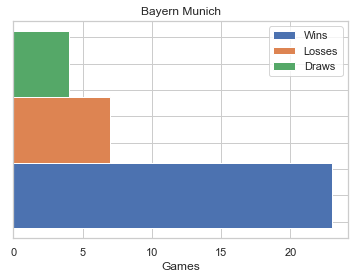

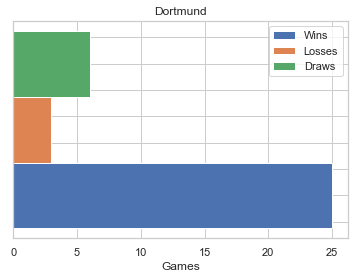

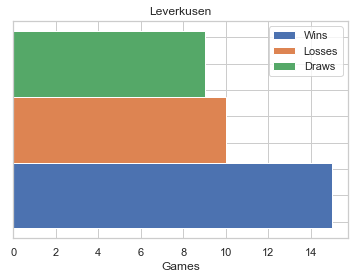

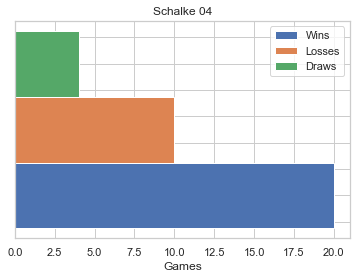

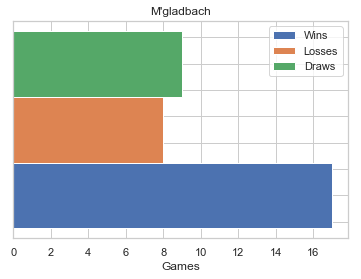

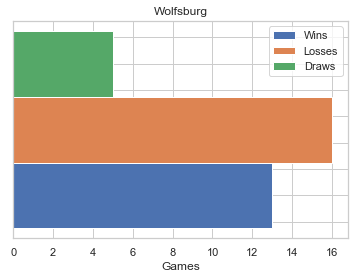

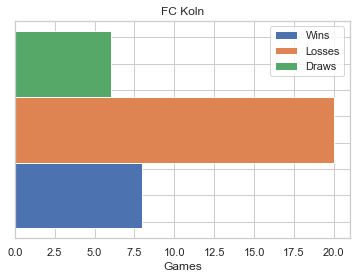

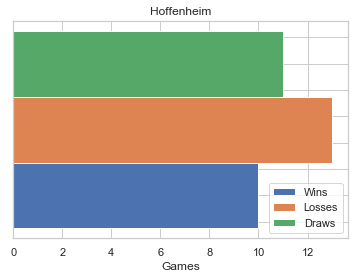

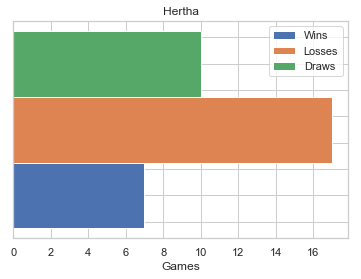

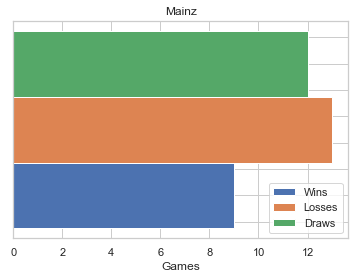

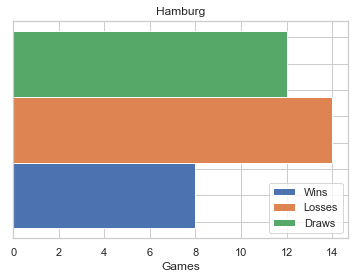

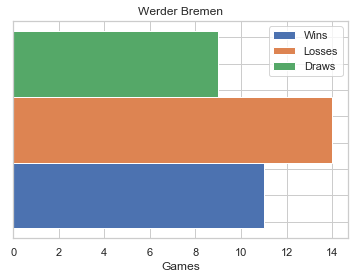

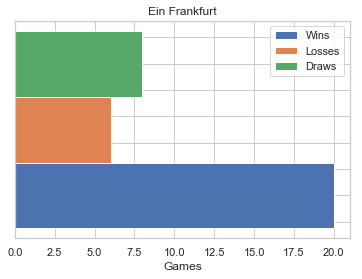

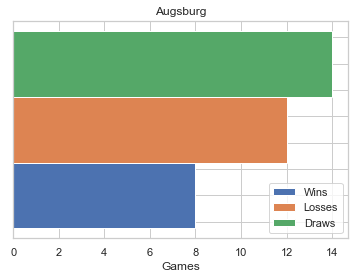

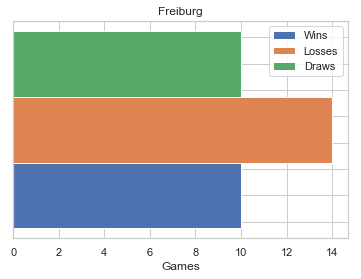

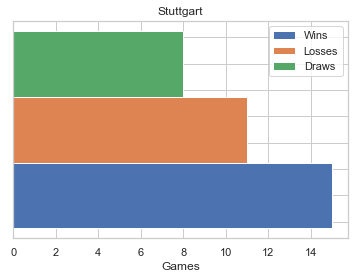

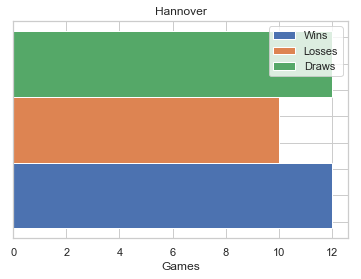

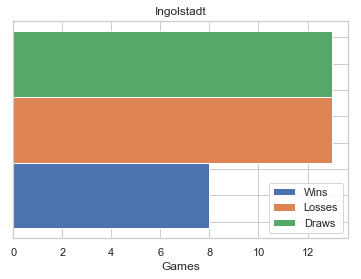

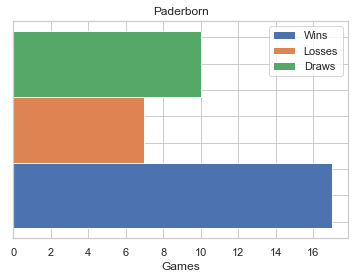

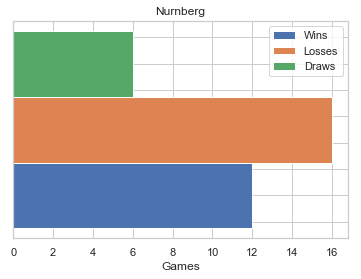

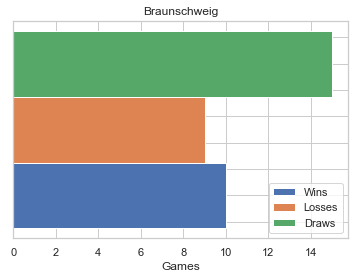

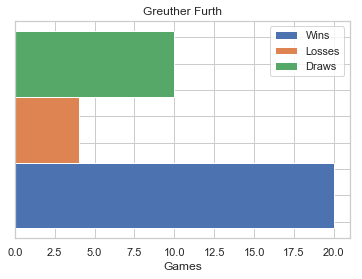

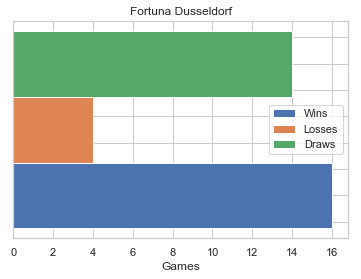

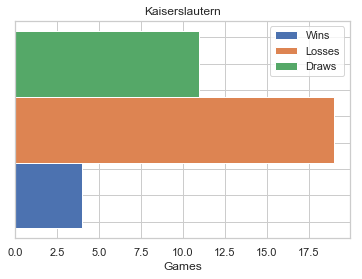

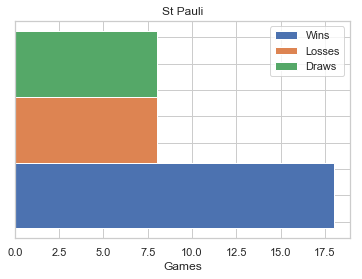

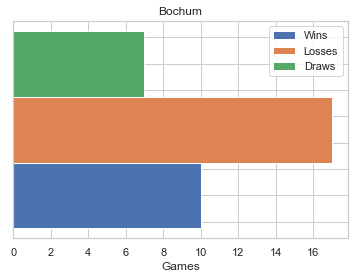

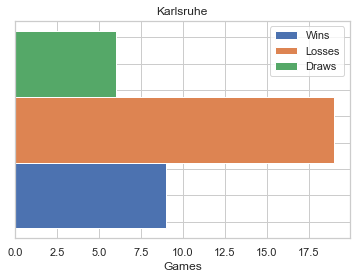

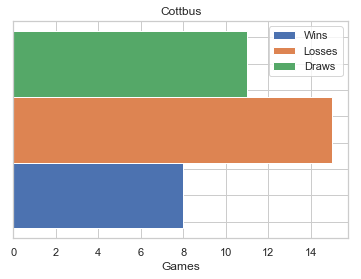

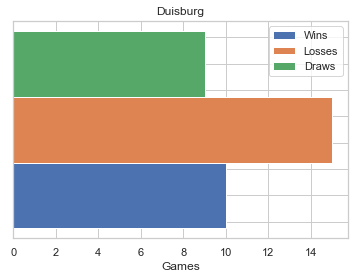

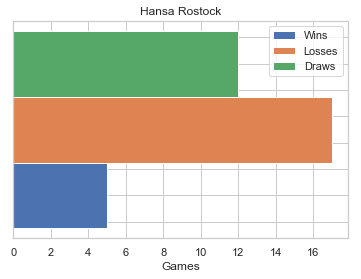

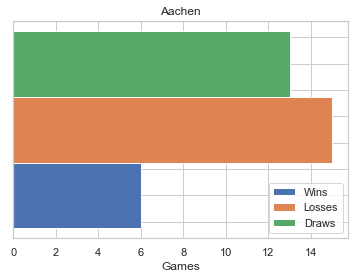

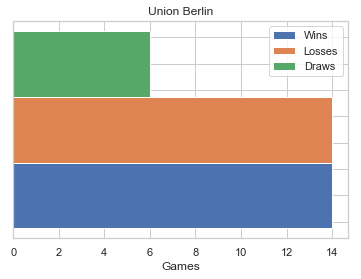

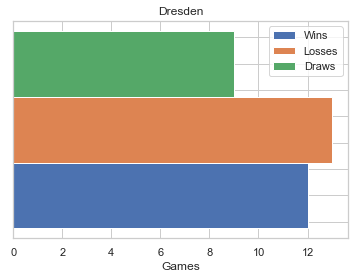

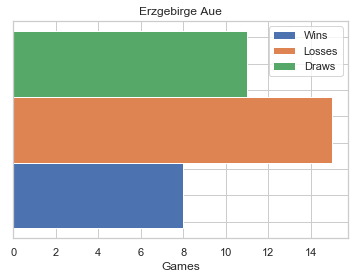

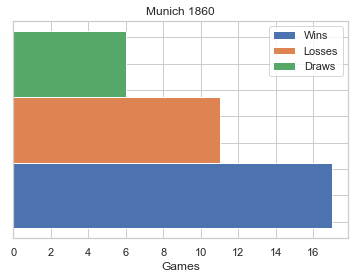

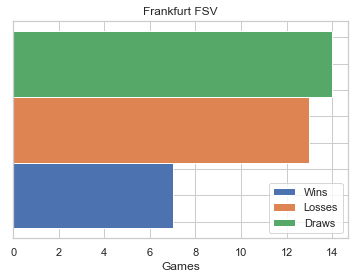

In [318]:
for idx, row in statsDF.iterrows():
    win_loss_chart(row)

In [219]:
# To evaluate which games were held on days of precipitation, we leverage the dark sky web resource to find the weather
#   in Berlin (as a surrogate city agreed with our teachers). 

import requests
from datetime import timedelta, date

In [220]:
# Create a weather_getter class that contains several functions to enable us to retrieve the weather in Berlin for
# the date range that the 2011 soccer season plays in.  We noted that there is a section called "precipProbability"
# on their site that has a 0 if no precipitation and 1 if there is precipitation. We want to retrieve the dates
# where the site indicates precipProbability = 1.

# ask for a return of the date and "True" if precipitation

class weather_getter:
    #precip() Enter date as YYYY-MM-DD. Returns a boolean T/F for whether there was precipitation in Berlin that day.
    #enter a date range start date, end date 
    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
    
    def daterange(self):
        #parse dates from string type
        if type(self.start_date)==str:
            s_year = int(self.start_date[:4])
            s_month = int(self.start_date[5:7])
            s_day = int(self.start_date[8:])
            self.start_date = date(s_year, s_month, s_day)
        if type(self.end_date)==str:
            e_year = int(self.end_date[:4])
            e_month = int(self.end_date[5:7])
            e_day = int(self.end_date[8:])
            self.end_date = date(e_year, e_month, e_day)
        dates = []
        for n in range(int ((self.end_date - self.start_date).days)+1):
            current_date = self.start_date + timedelta(n)
            dates.append(current_date.strftime("%Y-%m-%d"))
        return dates
    
    def precip(self, date):    
        resp = requests.get("https://api.darksky.net/forecast/6bb9533b8324c3e5349243c1bdf9cacd/52.5200,13.4050,{}T12:00:00+0100".format(date))
        return bool(eval(resp.text)['daily']['data'][0]['precipProbability'])
    
    def rain_date(self):
        dates_range = self.daterange()
        date = []
        rain = []
        for d in dates_range:
            rainy_bool = self.precip(d)
            date.append(d)
            rain.append(rainy_bool)
        rain_dates = {'date': date, 'rain': rain}
        rain_dates_df = pd.DataFrame(rain_dates, columns = ['date', 'rain']).set_index('date')
        return rain_dates_df

In [222]:
# As part of this function, we must supply the date range that corresponds to the 2011 soccer season. Retrieve this
# from the original table using sqlite select.

c.execute("""SELECT min(date), max(date)
            FROM 'FlatView_Advanced'
            WHERE "Season"=2011;""").fetchall()

[('2011-07-15', '2012-05-06')]

In [319]:
# define the date range variable for the class to retrieve weather information and run the function to retrieve 
# the date and rain information, into a df called berlin_rain.

berlin_dates = weather_getter('2011-07-15', '2012-05-06')
berlin_rain = berlin_dates.rain_date()

In [329]:
# review berlin_rain. The length of the file tells us there were 297 days with precipitation in the 2011 date range.
# But not all days were game days.

berlin_rain.head()
len(berlin_rain)

297

In [229]:
# Reminder of the file we retrieved originally - the information from soccer matches. We want to add a column with the
# rain information.
results.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0
1,1094,1,Bayern Munich,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1.0
2,1211,1,Bayern Munich,2011-08-20,Bayern Munich,Hamburg,5,0,H,5.0
3,1104,1,Bayern Munich,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,3.0
4,1197,1,Bayern Munich,2011-09-10,Bayern Munich,Freiburg,7,0,H,7.0


In [290]:
# Use the merge function to merge the rain information from the berlin_rain df with the results file, linked by the
#  dates in each file.

results_rain = results.merge(berlin_rain, left_on=['Date'], right_on=['date'])
results_rain.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores,rain
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0,True
1,1276,3,Leverkusen,2011-08-07,Mainz,Leverkusen,2,0,H,0.0,True
2,1491,6,M'gladbach,2011-08-07,Bayern Munich,M'gladbach,0,1,A,1.0,True
3,1276,11,Mainz,2011-08-07,Mainz,Leverkusen,2,0,H,2.0,True
4,1171,14,Ein Frankfurt,2011-08-07,Braunschweig,Ein Frankfurt,0,3,A,3.0,True


In [363]:
# Use a query to determine how many records in our results file are now flagged as a rain game.

only_rain_games = results_rain.loc[results_rain['rain']==True]
len(only_rain_games)

420

In [346]:
# Validate that the column rain was created as expected by looking at the first five rows of the table.

only_rain_games.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores,rain
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0,True
1,1276,3,Leverkusen,2011-08-07,Mainz,Leverkusen,2,0,H,0.0,True
2,1491,6,M'gladbach,2011-08-07,Bayern Munich,M'gladbach,0,1,A,1.0,True
3,1276,11,Mainz,2011-08-07,Mainz,Leverkusen,2,0,H,2.0,True
4,1171,14,Ein Frankfurt,2011-08-07,Braunschweig,Ein Frankfurt,0,3,A,3.0,True


In [348]:
# The table structure includes a row for every team per game, thus we expect two rows for every game. Validate
# that there are duplicates as expected and count the results.

duplicates = only_rain_games[only_rain_games.duplicated(subset='Match_ID', keep=False)].sort_values(by='Match_ID')
print(len(duplicates))
duplicates.head()

420


,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores,rain
378,1092,22,Nurnberg,2012-03-31,Nurnberg,Bayern Munich,0,1,A,0.0,True
368,1092,1,Bayern Munich,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1.0,True
230,1097,1,Bayern Munich,2012-01-20,M'gladbach,Bayern Munich,3,1,H,1.0,True
231,1097,6,M'gladbach,2012-01-20,M'gladbach,Bayern Munich,3,1,H,3.0,True
78,1100,5,Schalke 04,2011-09-18,Schalke 04,Bayern Munich,0,2,A,0.0,True


In [353]:
# Validate the number of unique matches using the .unique function. This means there were 210 matches that were played
#   on days marked as having precipitation.

rain_matches_unique = np.unique(duplicates['Match_ID'].values)
len(rain_matches_unique)

210

In [291]:
# Retrieving the original dataframe retrieved, we want to add a calculated column that indicates whether the team
#   won the game indicated in the row. This is done with a function that converts the FTR field (indicates whether
#   home team (H) or away team (A) won the match) and whether the team was a home team or away team (true when the 
#   HomeTeam = Unique_Team or AwayTeam = Unique_Team respectively).  In the case of wins, we return a 1.

def conditions(s):
    if (s['HomeTeam'] == s['Unique_Team']) and (s['FTR'] == 'H'):
        return int(1)
    elif (s['AwayTeam'] == s['Unique_Team']) and (s['FTR'] == 'A'):
        return int(1)
    else:
        return int(0)

In [358]:
# Create a column in df called Wins to house the results of the calculation above.

df['Wins'] = df.apply(conditions, axis=1)

In [314]:
# Explore results of the column creation and calculation.
df

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores,rain,Wins
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0,True,0
1,1276,3,Leverkusen,2011-08-07,Mainz,Leverkusen,2,0,H,0.0,True,0
2,1491,6,M'gladbach,2011-08-07,Bayern Munich,M'gladbach,0,1,A,1.0,True,1
3,1276,11,Mainz,2011-08-07,Mainz,Leverkusen,2,0,H,2.0,True,1
4,1171,14,Ein Frankfurt,2011-08-07,Braunschweig,Ein Frankfurt,0,3,A,3.0,True,1
5,1171,23,Braunschweig,2011-08-07,Braunschweig,Ein Frankfurt,0,3,A,0.0,True,0
6,1260,29,Karlsruhe,2011-08-07,Erzgebirge Aue,Karlsruhe,0,2,A,2.0,True,1
7,1143,32,Duisburg,2011-08-07,Frankfurt FSV,Duisburg,0,0,D,0.0,True,0
8,1260,39,Erzgebirge Aue,2011-08-07,Erzgebirge Aue,Karlsruhe,0,2,A,0.0,True,0
9,1143,44,Frankfurt FSV,2011-08-07,Frankfurt FSV,Duisburg,0,0,D,0.0,True,0


In [360]:
# Create a df called only_rain_games2 from df where the rain field indicates it was precipitating that day.

only_rain_games2 = df.loc[df['rain']==True]
len(only_rain_games2)

420

In [361]:
# Summarize in rain_days2 the rain days by team. 

rain_days2_temp = only_rain_games2.groupby('Unique_Team')['rain'].sum()
rain_days2 = pd.Series.to_frame(rain_days2_temp)
rain_days2.head()

,rain
Unique_Team,
Aachen,13.0
Augsburg,11.0
Bayern Munich,11.0
Bochum,11.0
Braunschweig,9.0


In [362]:
# Summarize in rain_score_stats2 the wins of each team. (This is the wins in the days with precipitation.)

rain_score_stats2_temp = only_rain_games2.groupby('Unique_Team')['Wins'].sum()
rain_score_stats2 = pd.Series.to_frame(rain_score_stats2_temp)
rain_score_stats2.head()

,Wins
Unique_Team,
Aachen,3
Augsburg,4
Bayern Munich,8
Bochum,3
Braunschweig,4


In [364]:
# Merge together the df with summary of days played in rain and summary of wins on those days.

rain_statsDF = pd.merge(rain_days2, rain_score_stats2, on ='Unique_Team')
rain_statsDF.head()

,rain,Wins
Unique_Team,,
Aachen,13.0,3
Augsburg,11.0,4
Bayern Munich,11.0,8
Bochum,11.0,3
Braunschweig,9.0,4


In [366]:
#Create new column that calculates the winning percentage for each team on game days with precipitation.

rain_statsDF['Win_Pct'] = round((rain_statsDF['Wins'] / rain_statsDF['rain']),2)*100
rain_statsDF

,rain,Wins,Win_Pct
Unique_Team,,,
Aachen,13.0,3,23.0
Augsburg,11.0,4,36.0
Bayern Munich,11.0,8,73.0
Bochum,11.0,3,27.0
Braunschweig,9.0,4,44.0
Cottbus,10.0,3,30.0
Dortmund,10.0,6,60.0
Dresden,9.0,3,33.0
Duisburg,16.0,4,25.0


In [368]:
# Use the merge function to make a final table with four columns:  Team_Name, Total_Scored_Goals_2011, Total_Wins_2011, 
#  Win_Pct_Prcpt_Games by merging colums from score_stats, Win_Stats, rain_statsDF using the Unique_Team as the link.
#  Merge first two:  score_stats and win_stats.

Project2_df = pd.merge(score_stats, win_stats, on = 'Unique_Team')
Project2_df.head()

,Unique_Team,TeamScores,Win_Games
0,Aachen,30.0,6
1,Augsburg,36.0,8
2,Bayern Munich,77.0,23
3,Bochum,41.0,10
4,Braunschweig,37.0,10


In [370]:
# Use the merge function to make a final table with four columns:  Team_Name, Total_Scored_Goals_2011, Total_Wins_2011, 
#  Win_Pct_Prcpt_Games by merging colums from score_stats, Win_Stats, rainstatsDF using the Unique_Team as the link.
#  Merge next:  Projects2_df and rain_statsDF.

Project2_df = pd.merge(Project2_df, rain_statsDF, on = 'Unique_Team')
Project2_df.head()

,Unique_Team,TeamScores,Win_Games,rain,Wins,Win_Pct
0,Aachen,30.0,6,13.0,3,23.0
1,Augsburg,36.0,8,11.0,4,36.0
2,Bayern Munich,77.0,23,11.0,8,73.0
3,Bochum,41.0,10,11.0,3,27.0
4,Braunschweig,37.0,10,9.0,4,44.0


In [372]:
# drop unneeded column "Wins". (Accidentally run twice....) See next cell for df results.

Project2_df = Project2_df.drop('Wins', axis = 1)

KeyError: "['Wins'] not found in axis"

In [374]:
Project2_df

,Unique_Team,TeamScores,Win_Games,rain,Win_Pct
0,Aachen,30.0,6,13.0,23.0
1,Augsburg,36.0,8,11.0,36.0
2,Bayern Munich,77.0,23,11.0,73.0
3,Bochum,41.0,10,11.0,27.0
4,Braunschweig,37.0,10,9.0,44.0
5,Cottbus,30.0,8,10.0,30.0
6,Dortmund,80.0,25,10.0,60.0
7,Dresden,50.0,12,9.0,33.0
8,Duisburg,42.0,10,16.0,25.0
9,Ein Frankfurt,76.0,20,9.0,33.0


In [376]:
# Rename column names

Project2_df.rename(columns={'Unique_Team': 'Team_Name'}, inplace=True)

In [379]:
Project2_df.rename(columns={'TeamScores': 'Total_Scored_Goals'}, inplace=True)

In [380]:
Project2_df.rename(columns={'Win_Games': 'Total_Wins'}, inplace=True)

In [381]:
Project2_df.rename(columns={'Win_Pct':'Win_Pct_Pcpt_Games'}, inplace=True)

In [383]:
Project2_df.head()

,Team_Name,Total_Scored_Goals,Total_Wins,rain,Win_Pct_Pcpt_Games
0,Aachen,30.0,6,13.0,23.0
1,Augsburg,36.0,8,11.0,36.0
2,Bayern Munich,77.0,23,11.0,73.0
3,Bochum,41.0,10,11.0,27.0
4,Braunschweig,37.0,10,9.0,44.0


In [385]:
# drop unneeded column "rain". 

Project2_df = Project2_df.drop('rain', axis = 1)

KeyError: "['rain'] not found in axis"

In [386]:
Project2_df

,Team_Name,Total_Scored_Goals,Total_Wins,Win_Pct_Pcpt_Games
0,Aachen,30.0,6,23.0
1,Augsburg,36.0,8,36.0
2,Bayern Munich,77.0,23,73.0
3,Bochum,41.0,10,27.0
4,Braunschweig,37.0,10,44.0
5,Cottbus,30.0,8,30.0
6,Dortmund,80.0,25,60.0
7,Dresden,50.0,12,33.0
8,Duisburg,42.0,10,25.0
9,Ein Frankfurt,76.0,20,33.0
